In [3]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read the data

df = pd.read_excel(r'C:\Users\Admin\Documents\#data analysis\Portfolio Project\fastfood.xlsx')

In [4]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [28]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.110680,7.262136,27.884466,15.176699,16.023301,22.873786
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.006702,6.761301,17.667342,24.371673,24.053027,19.772382
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,10.000000,8.000000,15.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,15.000000,15.000000,25.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [7]:
# find null values

df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [26]:
# fill na with median

df.fillna(df.median(numeric_only=True),inplace=True)

In [10]:
# find duplicate values

df.duplicated().sum()

2

In [12]:
df.shape

(515, 17)

In [13]:
# drop duplicated rows

df.drop_duplicates()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Taco Bell,Original Triple Double Crunchwrap,700,270,30,9.0,0.5,45,1550,85,9.0,7,23.0,15.0,6.0,25.0,Other
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [29]:
df['restaurant'].value_counts()

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

<Axes: xlabel='calories', ylabel='total_fat'>

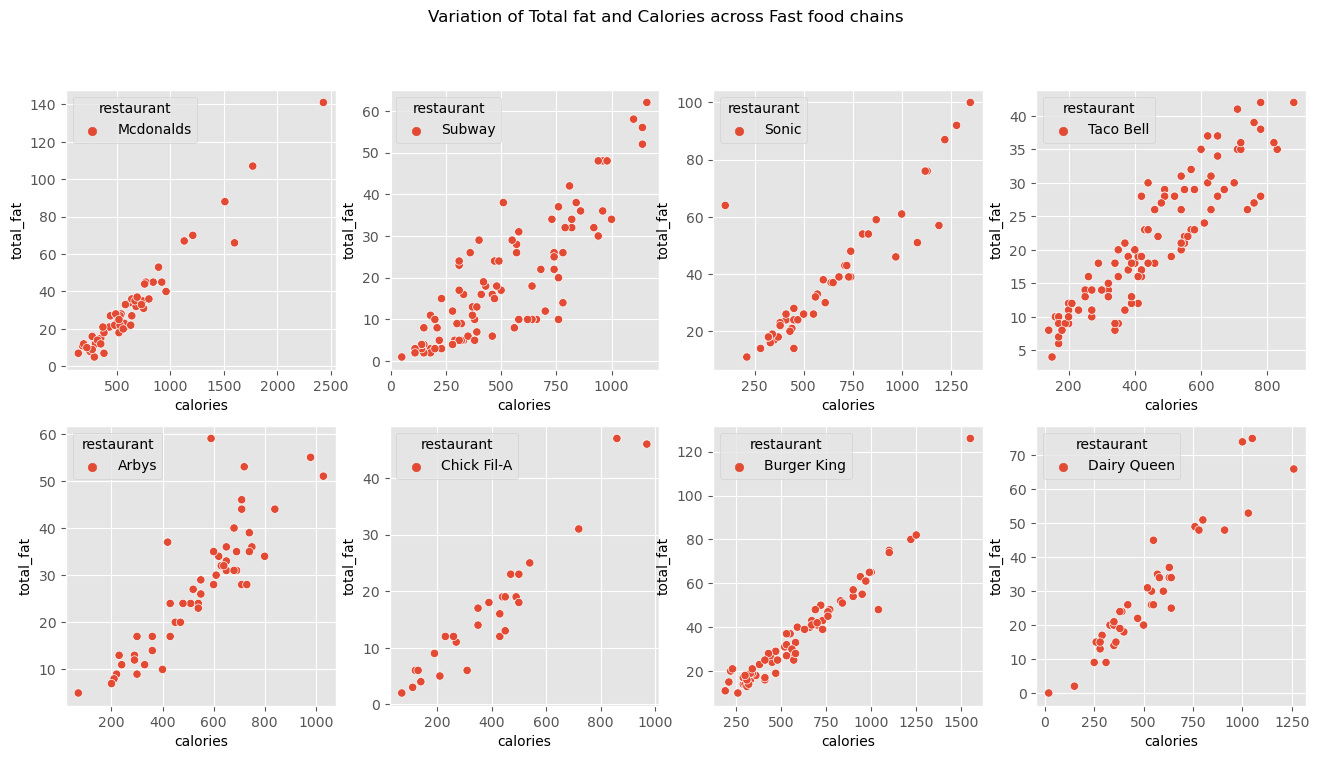

In [37]:
fig, axes = plt.subplots(2,4, figsize=(16,8))

fig.suptitle('Variation of Total fat and Calories across Fast food chains')

sns.scatterplot(df[df['restaurant']=='Mcdonalds'], ax=axes[0,0], x='calories', y='total_fat',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Subway'], ax=axes[0,1], x='calories', y='total_fat',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Sonic'], ax=axes[0,2], x='calories', y='total_fat',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Taco Bell'], ax=axes[0,3], x='calories', y='total_fat',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Arbys'], ax=axes[1,0], x='calories', y='total_fat',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Chick Fil-A'], ax=axes[1,1], x='calories', y='total_fat',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Burger King'], ax=axes[1,2], x='calories', y='total_fat',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Dairy Queen'], ax=axes[1,3], x='calories', y='total_fat',hue='restaurant')

The calories linear varies accross all fast food chains

<Axes: xlabel='calories', ylabel='cholesterol'>

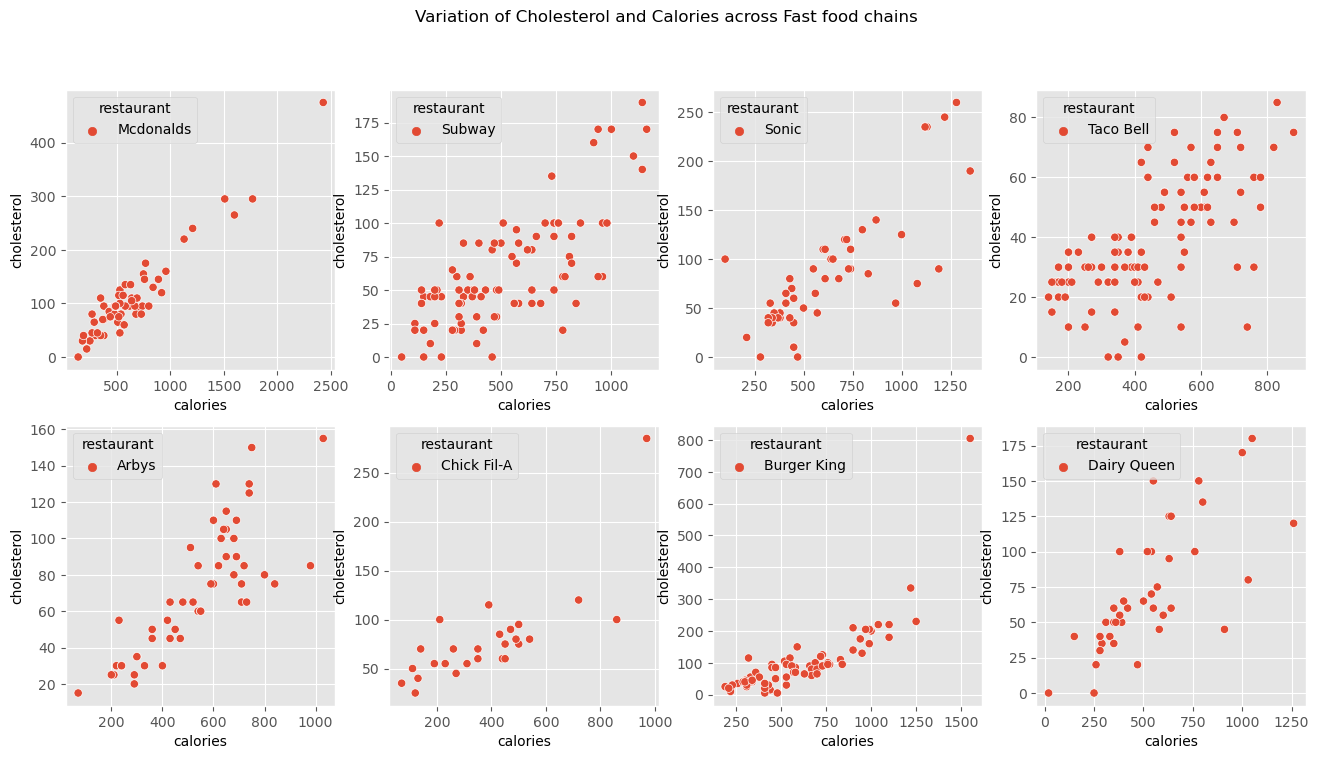

In [38]:
fig, axes = plt.subplots(2,4, figsize=(16,8))

fig.suptitle('Variation of Cholesterol and Calories across Fast food chains')

sns.scatterplot(df[df['restaurant']=='Mcdonalds'], ax=axes[0,0], x='calories', y='cholesterol',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Subway'], ax=axes[0,1], x='calories', y='cholesterol',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Sonic'], ax=axes[0,2], x='calories', y='cholesterol',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Taco Bell'], ax=axes[0,3], x='calories', y='cholesterol',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Arbys'], ax=axes[1,0], x='calories', y='cholesterol',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Chick Fil-A'], ax=axes[1,1], x='calories', y='cholesterol',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Burger King'], ax=axes[1,2], x='calories', y='cholesterol',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Dairy Queen'], ax=axes[1,3], x='calories', y='cholesterol',hue='restaurant')

The scatter plots show that food items served accorss most of the fast food chain have cholesterol varying
linearly with calories

<Axes: xlabel='calories', ylabel='total_carb'>

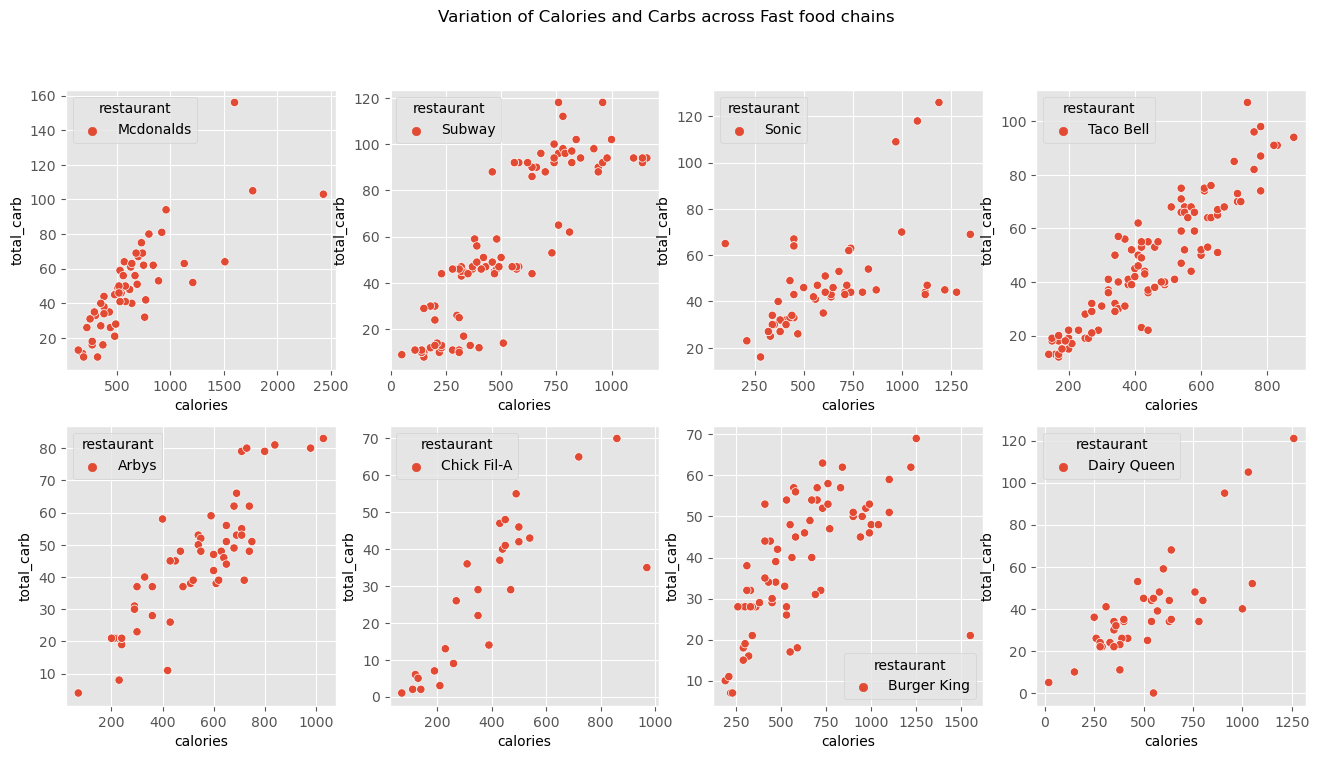

In [40]:
fig, axes = plt.subplots(2,4, figsize=(16,8))

fig.suptitle('Variation of Calories and Carbs across Fast food chains')

sns.scatterplot(df[df['restaurant']=='Mcdonalds'], ax=axes[0,0], x='calories', y='total_carb', hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Subway'], ax=axes[0,1], x='calories', y='total_carb',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Sonic'], ax=axes[0,2], x='calories', y='total_carb',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Taco Bell'], ax=axes[0,3], x='calories', y='total_carb',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Arbys'], ax=axes[1,0], x='calories', y='total_carb',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Chick Fil-A'], ax=axes[1,1], x='calories', y='total_carb',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Burger King'], ax=axes[1,2], x='calories', y='total_carb',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Dairy Queen'], ax=axes[1,3], x='calories', y='total_carb',hue='restaurant')

The scatter plots show that food items served accorss most of the fast food chain have carbs varying linearly with calories

<Axes: xlabel='calories', ylabel='sodium'>

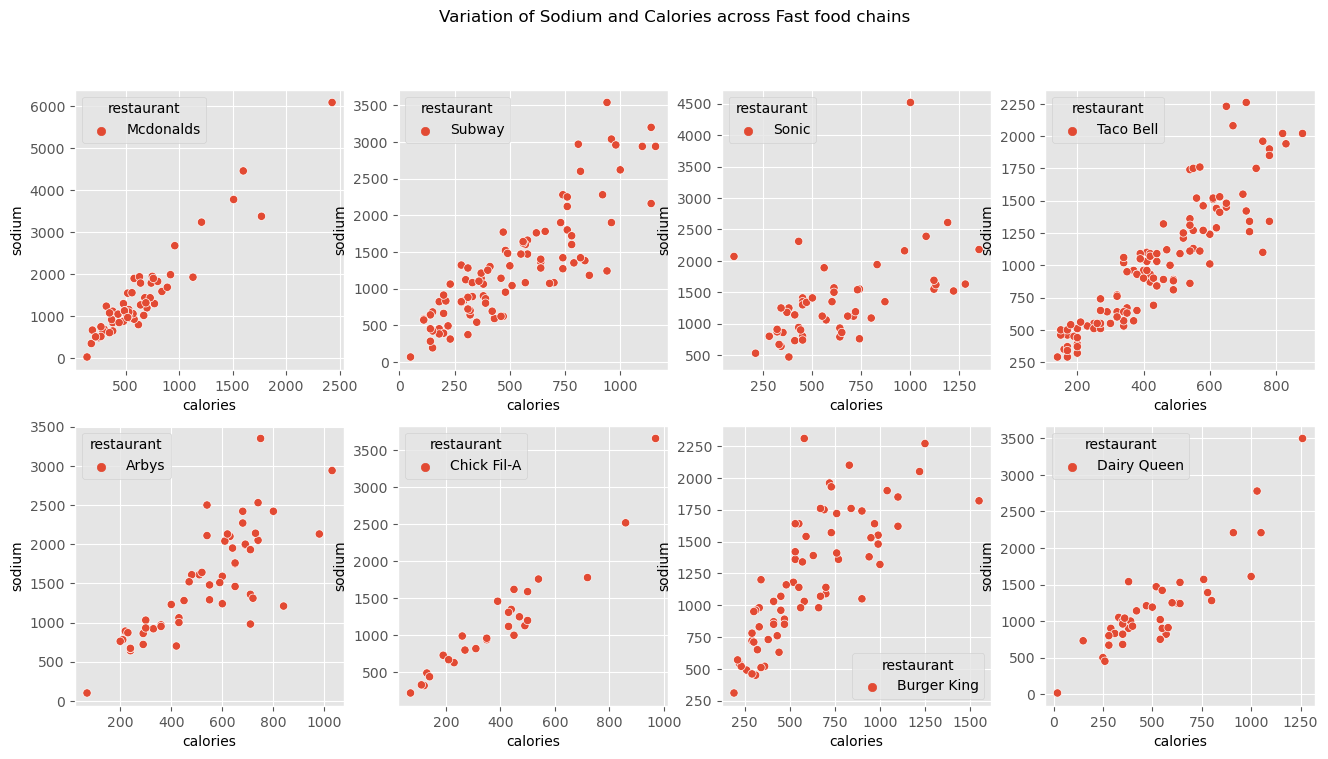

In [41]:
fig, axes = plt.subplots(2,4, figsize=(16,8))

fig.suptitle('Variation of Sodium and Calories across Fast food chains')

sns.scatterplot(df[df['restaurant']=='Mcdonalds'], ax=axes[0,0], x='calories', y='sodium', hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Subway'], ax=axes[0,1], x='calories', y='sodium',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Sonic'], ax=axes[0,2], x='calories', y='sodium',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Taco Bell'], ax=axes[0,3], x='calories', y='sodium',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Arbys'], ax=axes[1,0], x='calories', y='sodium',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Chick Fil-A'], ax=axes[1,1], x='calories', y='sodium',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Burger King'], ax=axes[1,2], x='calories', y='sodium',hue='restaurant')
sns.scatterplot(df[df['restaurant']=='Dairy Queen'], ax=axes[1,3], x='calories', y='sodium',hue='restaurant')

The scatter plots show that food items served accorss most of the fast food chain have sodium content varying linearly with calories

In [48]:
# catogorizrd different type of meats

df_por=df.loc[df['item'].str.contains("pork", case=False)]
df_bac=df.loc[df['item'].str.contains("bacon", case=False)]
df_ham=df.loc[df['item'].str.contains("ham", case=False)]
df_bacon=pd.concat([df_por,df_bac,df_ham])

df_bris=df.loc[df['item'].str.contains("brisket", case=False)]
df_bee=df.loc[df['item'].str.contains("beef", case=False)]
df_beef=pd.concat([df_bee,df_bris])

df_chick=df.loc[df['item'].str.contains("chicken", case=False)]

[Text(0.5, 1.0, 'Chicken')]

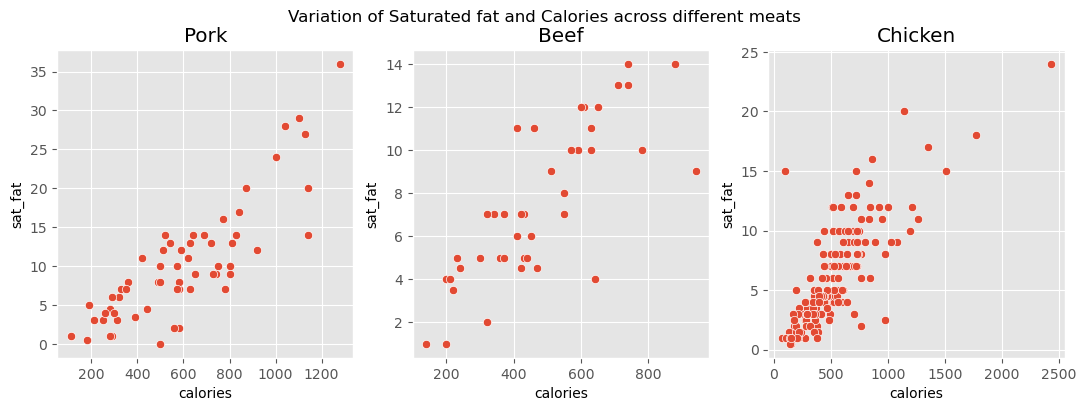

In [49]:
fig, axes = plt.subplots(1,3, figsize=(13,4))

fig.suptitle('Variation of Saturated fat and Calories across different meats')

sns.scatterplot(df_bacon, ax=axes[0], x='calories', y='sat_fat').set(title='Pork')
sns.scatterplot(df_beef, ax=axes[1], x='calories', y='sat_fat').set(title='Beef')
sns.scatterplot(df_chick, ax=axes[2], x='calories', y='sat_fat').set(title='Chicken')

It is observed that saturated fats increase linearly with calories and pork has the highest saturated fats with calories

[Text(0.5, 1.0, 'Chicken')]

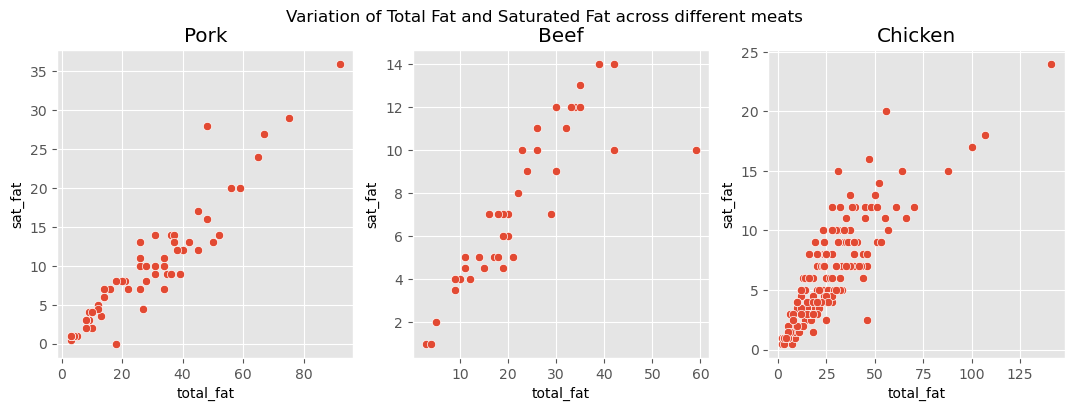

In [50]:
fig, axes = plt.subplots(1,3, figsize=(13,4))

fig.suptitle('Variation of Total Fat and Saturated Fat across different meats')

sns.scatterplot(df_bacon, ax=axes[0], x='total_fat', y='sat_fat').set(title='Pork')
sns.scatterplot(df_beef, ax=axes[1], x='total_fat', y='sat_fat').set(title='Beef')
sns.scatterplot(df_chick, ax=axes[2], x='total_fat', y='sat_fat').set(title='Chicken')

It is observed that saturated fats increase linearly with total fats and pork has the highest saturated fats with total fats

[Text(0.5, 1.0, 'Chicken')]

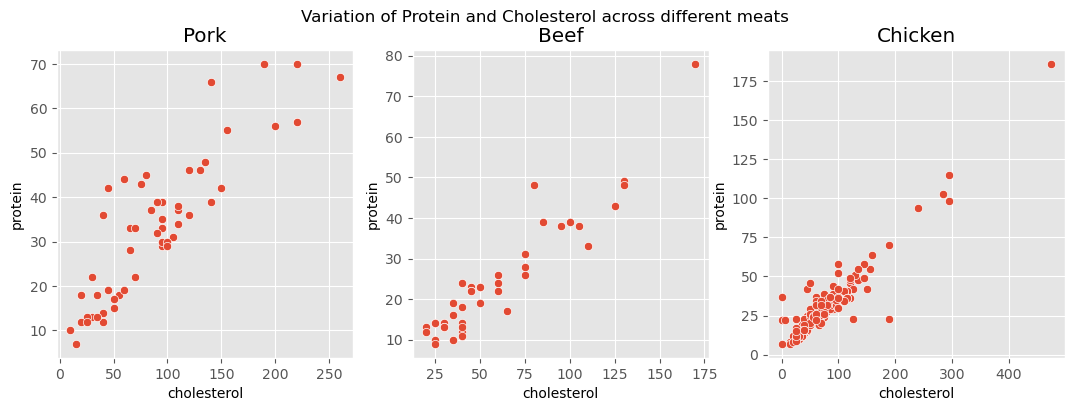

In [51]:
fig, axes = plt.subplots(1,3, figsize=(13,4))

fig.suptitle('Variation of Protein and Cholesterol across different meats')

sns.scatterplot(df_bacon, ax=axes[0], x='cholesterol', y='protein').set(title='Pork')
sns.scatterplot(df_beef, ax=axes[1], x='cholesterol', y='protein').set(title='Beef')
sns.scatterplot(df_chick, ax=axes[2], x='cholesterol', y='protein').set(title='Chicken')

It is obeserved that protein increase linearly with cholesterol and chicken has highest protein with cholesterol

C:\Users\Admin\AppData\Local\Temp\ipykernel_11336\1756636319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidth=0.5, annot=True)


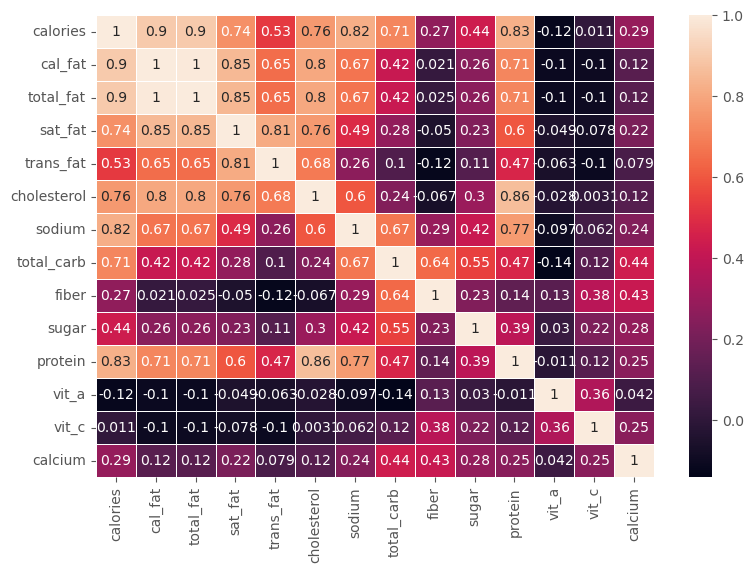

In [53]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),linewidth=0.5, annot=True)
plt.show()

The correlation plot clearly shows that protein, calories from fat, total fat, saturated fat, sodium, cholesterol carbohydrates and protein are positively correlated to calories.

The positive insight of this plot is that the protein content of these foods are high, but the negative insight is that these foods are high cholesterol, saturated fats, trans fats and sodium levels that comes with high protein content.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11336\3055033963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bacon.corr(),linewidth=0.5, annot=True)


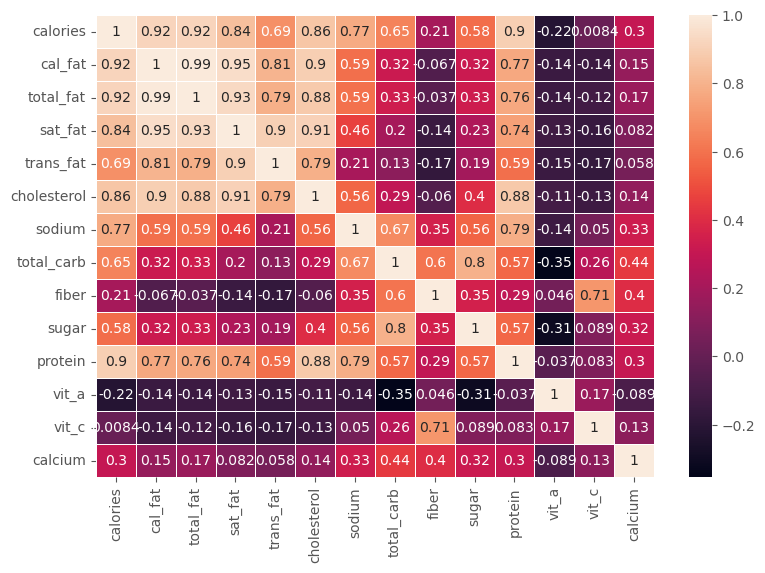

C:\Users\Admin\AppData\Local\Temp\ipykernel_11336\3055033963.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_beef.corr(),linewidth=0.5, annot=True)


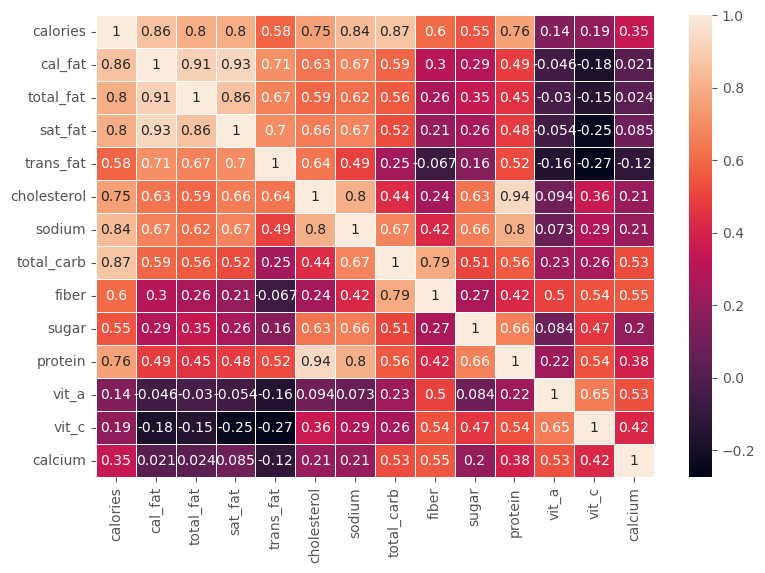

C:\Users\Admin\AppData\Local\Temp\ipykernel_11336\3055033963.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_chick.corr(),linewidth=0.5, annot=True)


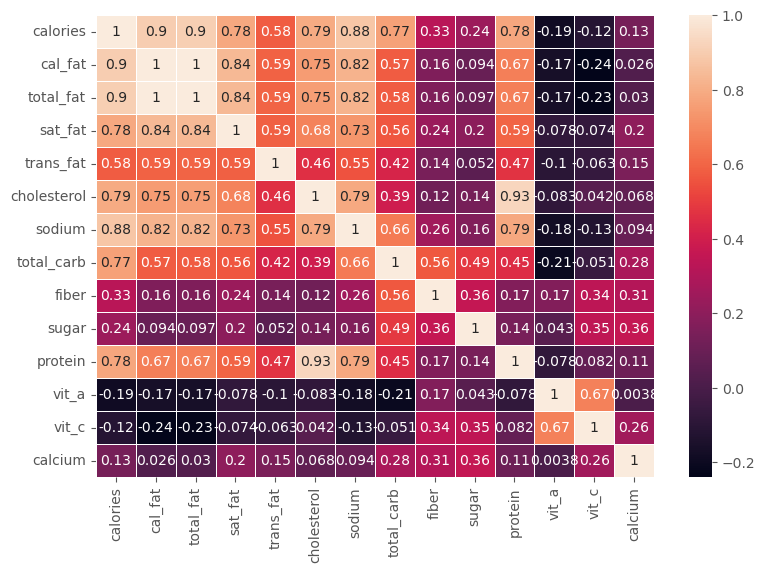

In [59]:
plt.figure(figsize=(9,6))
sns.heatmap(df_bacon.corr(),linewidth=0.5, annot=True)
plt.show()

plt.figure(figsize=(9,6))
sns.heatmap(df_beef.corr(),linewidth=0.5, annot=True)
plt.show()

plt.figure(figsize=(9,6))
sns.heatmap(df_chick.corr(),linewidth=0.5, annot=True)
plt.show()

The correlation plots show the correlation of different type of meats, in which pork has the highest positive correlation of calories with that protein, cholesterol, trans fat, saturated fat, and calories from fat.